In [2]:
import glob

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import numpy as np
import numpy_indexed as npi
import scipy as sp
import matplotlib.pyplot as plt
import time
import visa
import datetime
from scipy.optimize import curve_fit

In [5]:
pwd

'/Users/APR1/Google Drive/COLUMBIA/S6/InterLab/radiometer/notebooks'

In [6]:
cd /Users/APR1/Google Drive/COLUMBIA/S6/InterLab/radiometer/Data/Calibration


/Users/APR1/Google Drive/COLUMBIA/S6/InterLab/radiometer/Data/Calibration


In [9]:
tempFile = glob.glob("*.xlsx")
print(tempFile)
calibrationFile = glob.glob(tempFile[1][0:17]+"*.txt")
print(calibrationFile)
hotCalFile = '2016-11-18_16:29:45_Readout.txt'
dataDate = tempFile[0][0:10]
print(dataDate)

['2016-11-18_16-35-56_Temp.xlsx', '2016-11-18_16:35:56_Temp.xlsx', '~$2016-11-18_16-35-56_Temp.xlsx']
['2016-11-18_16:35:56_Readout.txt']
2016-11-18


In [14]:
powerData = np.loadtxt(calibrationFile[0])
powerData[:,1] = -powerData[:,1]
powerDataHot = np.loadtxt(hotCalFile)
powerDataHot[:,1] = -powerDataHot[:,1]
#print(powerData[:,0])

In [15]:
tempData = pd.read_excel(tempFile[0], 'Sheet1', header=3)
tempData.head()
pattern = '%Y-%m-%d %H:%M:%S'
epoch = datetime.datetime.utcfromtimestamp(0)
tempTime = []
for t in tempData['Absolute time']:
    tempTime.append((t - epoch).total_seconds())
tempTime = [x-tempTime[0]+powerData[0,0] for x in tempTime]
tempArray = np.array([tempTime,tempData['Temperature in Kelvin']])
#print(tempArray[0,:])

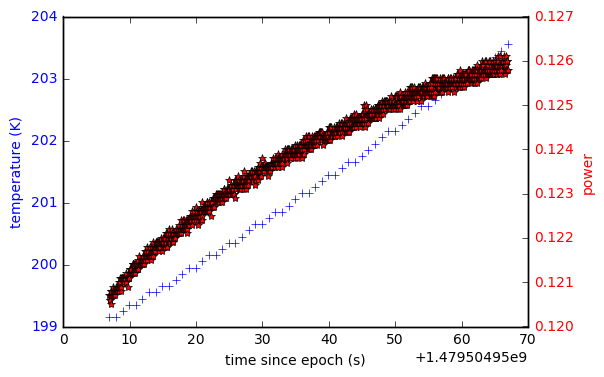

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(tempArray[0,:],tempArray[1,:],'b+')
ax1.set_xlabel('time since epoch (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('temperature (K)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(powerData[:,0],powerData[:,1],'r*')
ax2.set_ylabel('power', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

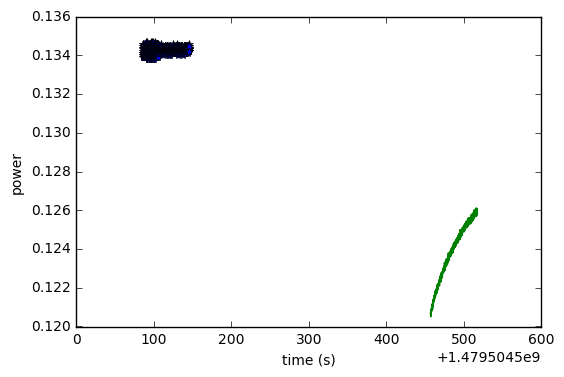

In [17]:
plot(powerDataHot[:,0],powerDataHot[:,1],'*')
plot(powerData[:,0],powerData[:,1])
ylabel('power')
xlabel('time (s)')
#print(powerData[:,0])

In [18]:
digitized = np.digitize(powerData[:,0],tempArray[0,:])
digitalize = np.digitize(powerData[:,0],tempArray[0,:])
powerSec = [powerData[digitized == i,1].mean() for i in range(1, len(tempArray[0,:]))]

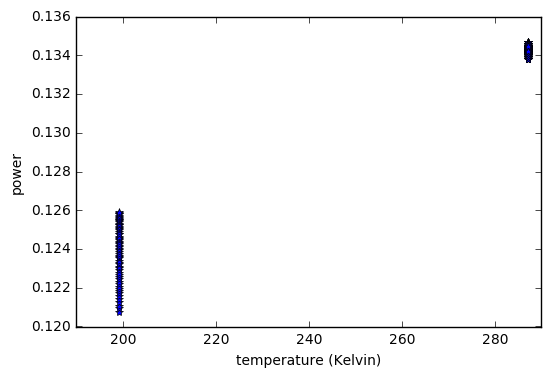

In [19]:
hotTemp = 14+273.15
temp = np.zeros(len(powerSec)+len(powerDataHot[:,1]))
power = np.zeros(len(powerSec)+len(powerDataHot[:,1]))
temp.fill(hotTemp)
temp[:len(powerSec)] = tempArray[1,:1]
power[:len(powerSec)] = powerSec[:]
power[len(powerSec):] = powerDataHot[:,1]
plot(temp,power,'*')
ylabel('power')
xlabel('temperature (Kelvin)')

Including hot temperature G=0.000118338559546, T_rec=847.568934377
Only for cold temp G1=0.00113299392409, T_rec1=-91.8693275607


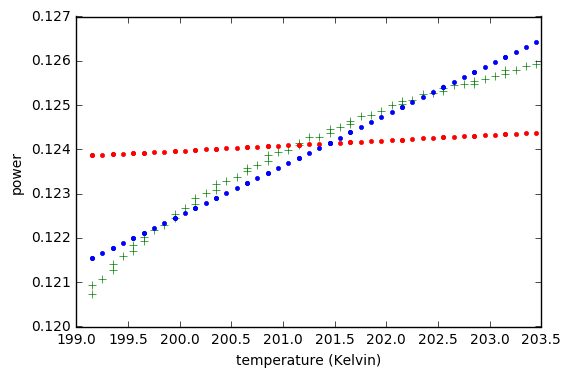

In [20]:
# choose the function to be fitted... 
def lin (x,a,b):
    return a*(x+b)

# ...and provide initial estimates for the parameters
a0,b0 = (0.005,90)

# exectute the curve fit...
linCoeffs, linFiterr = curve_fit(lin, temp, power, p0=(a0,b0))
G = linCoeffs[0]
Trec = linCoeffs[1]

# exectute the curve fit...
linCoeffs1, linFiterr1 = curve_fit(lin, tempArray[1,:-1], powerSec, p0=(a0,b0))
G1 = linCoeffs1[0]
Trec1 = linCoeffs1[1]

# ...and plot the results

# ...and plot the results
print ("Including hot temperature G=%s, T_rec=%s" % (linCoeffs[0], linCoeffs[1]))
print ("Only for cold temp G1=%s, T_rec1=%s" % (G1,Trec1))
plt.plot(tempArray[1,:-1],powerSec, 'g+')
plt.plot(tempArray[1,:-1],lin(tempArray[1,:-1],*linCoeffs),'r.')
plt.plot(tempArray[1,:-1],lin(tempArray[1,:-1],*linCoeffs1),'b.')
plt.ylabel('power')
plt.xlabel('temperature (Kelvin)')
plt.show()

In [21]:
print(powerSec)

[0.12073809523809523, 0.12093157894736846, 0.12107000000000004, 0.121285, 0.12140000000000002, 0.12158500000000001, 0.12171500000000002, 0.12185000000000001, 0.12193500000000002, 0.12201999999999999, 0.12217, 0.12228499999999998, 0.12245999999999999, 0.12252999999999999, 0.12266499999999998, 0.12277368421052631, 0.12290000000000001, 0.12302500000000001, 0.12309, 0.12322000000000002, 0.12328500000000002, 0.12338000000000002, 0.12352000000000003, 0.12357500000000002, 0.12365000000000001, 0.12373500000000001, 0.123865, 0.12392999999999998, 0.12398000000000001, 0.12408999999999999, 0.12414999999999998, 0.12428947368421052, 0.124275, 0.12437999999999998, 0.12444999999999999, 0.124515, 0.12457999999999998, 0.12463500000000001, 0.12474999999999999, 0.12476999999999998, 0.12486499999999998, 0.12499499999999999, 0.12501999999999999, 0.12509000000000001, 0.12511499999999998, 0.12525000000000003, 0.12526315789473688, 0.12531000000000006, 0.12539500000000001, 0.12545000000000001, 0.125475, 0.12547